In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

churn_data = pd.read_csv('C:\SkillBox\IDE\PY_13\churn.csv', sep=',')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, "Распределение баланса 'Ушедшие' vs 'Лояльные'")

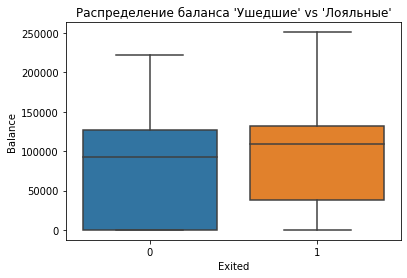

In [2]:
sp = sns.boxplot(x='Exited', y='Balance', data=churn_data)
sp.set_title("Распределение баланса 'Ушедшие' vs 'Лояльные'")



In [3]:
exited_0 = churn_data['Balance'][churn_data['Exited'] == 0]
exited_1 = churn_data['Balance'][churn_data['Exited'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=exited_1, name='Ушедшие', boxpoints='all'))
fig.add_trace(go.Box(x=exited_0, name='Лояльные', boxpoints='all'))
fig.update_layout(title="Распределение баланса среди ушедших и лояльных клиентов",
                xaxis_title="Сумма баланса")

fig.show()

In [4]:
nozero_balance = churn_data[churn_data['Balance']>0]
fig = px.histogram(nozero_balance, x=nozero_balance['Balance'], color=nozero_balance['Exited'])
fig.update_layout(barmode='group', 
                  title='Распределение баланса лояльных и ушедших клиентов среди ненулевых счетов',
                  xaxis_title="Сумма баланса",
                  yaxis_title="Количество счетов",
                  ) 

fig.show() 

In [5]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Box(x=exited_1, name='Ушедшие'), row=1, col=1)
fig.add_trace(go.Box(x=exited_0, name='Лояльные'), row=1, col=1)
fig.add_trace(go.Histogram(x=nozero_balance['Balance'][nozero_balance['Exited'] == 0], name='Лояльные'), row=1, col=2)
fig.add_trace(go.Histogram(x=nozero_balance['Balance'][nozero_balance['Exited'] == 1], name='Ушедшие'), row=1, col=2)
fig.add_trace(go.Bar(y=churn_data['Balance'].value_counts().index, x=churn_data['Exited']), row=1, col=3)

fig.show()

In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(y=churn_data['Balance'].value_counts().index, x=churn_data['Exited']))
fig.show()

<AxesSubplot: xlabel='Balance', ylabel='Count'>

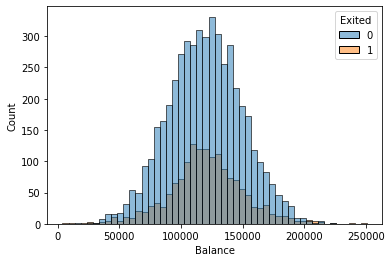

In [6]:
sns.histplot(nozero_balance, x='Balance', hue='Exited', bins=50)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_9884\2974420716.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



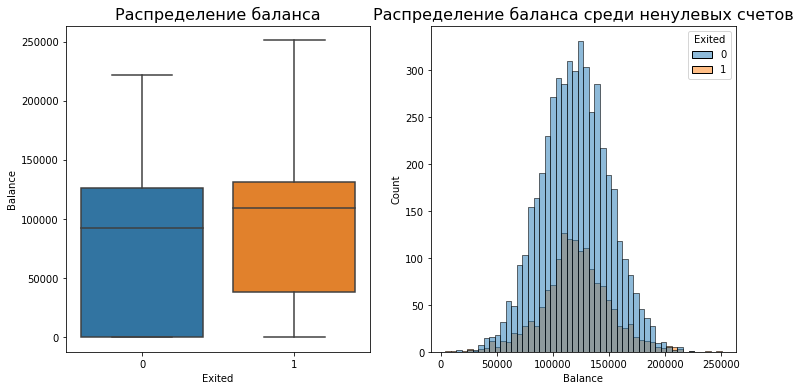

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='Exited', y='Balance', data=churn_data, ax=axes[0])
sns.histplot(nozero_balance, x='Balance', hue='Exited', bins=50, ax=axes[1])
axes[0].set_title('Распределение баланса', fontsize=16)
axes[1].set_title('Распределение баланса среди ненулевых счетов', fontsize=16)
fig.show()

In [33]:
salary_CS = churn_data.groupby('CustomerId')[['EstimatedSalary', 'CreditScore', 'Exited']].last()
salary_CS = salary_CS.sort_values(by=['EstimatedSalary'], ascending=True)
display(salary_CS)

,EstimatedSalary,CreditScore,Exited
CustomerId,,,
15791053,11.58,709,1
15679693,90.07,625,0
15786463,91.75,645,1
15639662,96.27,710,0
15602851,106.67,629,0
...,...,...,...
15709136,199909.32,620,0
15762331,199929.17,569,0
15697270,199953.33,608,0


C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_9884\855000748.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



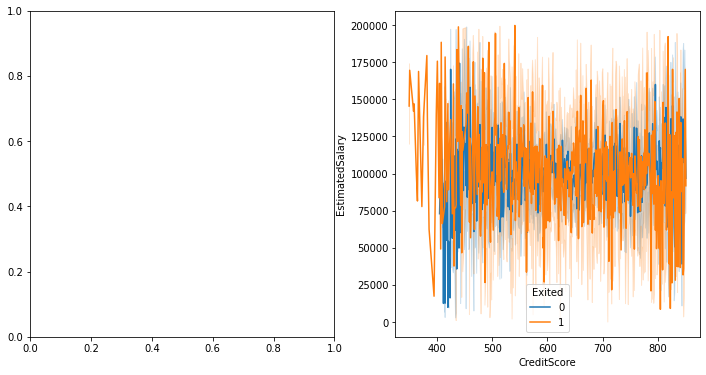

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(x="CreditScore", y='EstimatedSalary', hue='Exited', data=salary_CS)
fig.show()


In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=salary_CS['CreditScore'], y=salary_CS['EstimatedSalary']))
fig.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

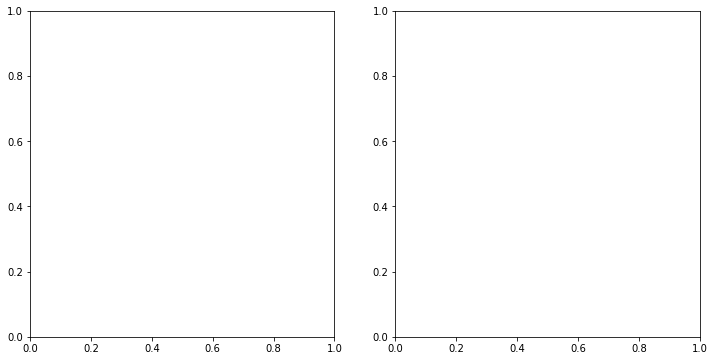

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(x='Exited', data=churn_data['Balance'])
ax[1].hist(nozero_balance, x='Balance', bins=50)
ax[0].set_title('Распределение баланса', fontsize=16)
ax[1].set_title('Распределение баланса среди ненулевых счетов', fontsize=16)
fig.show()

In [ ]:
sns.lineplot(x="CreditScore", y='EstimatedSalary',='Exited', data=salary_CS)
